In [7]:
from librerias import *
import calendar

In [8]:
btc_mes = pd.read_csv ('Data/btc_mes.csv')

btc_mes.set_index('Date', inplace=True)

btc_mes.index = pd.to_datetime(btc_mes.index)

btc_mes = btc_mes.loc['2014-01-01':]

btc_mes = pd.DataFrame (btc_mes ['Price'])


In [9]:
btc_mes ['DSR'] = btc_mes ['Price'].pct_change (1)


In [10]:
btc_mes ['log_returns'] = np.log (1 + btc_mes ['DSR'])


In [11]:
nombre_mes =  []
num_mes = []

for i in range ( 0, len (btc_mes)):
    df_date = str (btc_mes.index [i])
    df_month = df_date.split ('-') [1]
    df_month_name = calendar.month_name [int (df_month)]

    nombre_mes.append (df_month_name)
    num_mes.append (int(df_month))

In [12]:
# añadir la lista al df

btc_mes ['nombre_mes'] = nombre_mes
btc_mes ['num_mes'] = num_mes

In [13]:
# Agrupar los log returns en una variable

series = btc_mes.groupby ('num_mes') ['log_returns'].mean ()*100

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

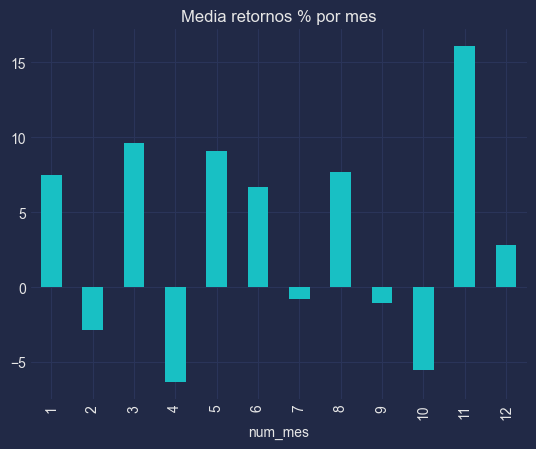

In [14]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
series.plot (kind = 'bar', title = 'Media retornos % por mes')
plt.xticks (rotation = 90)



In [15]:
# funcion para la seasonality

def get_seasonality (df):
    seasionality = []
    for i in range (0, len (df)):
        mes = df ['num_mes'] [i]
        # comprobar si el mes esta entre mayo y octubre
        if mes >= 5 and mes <= 10:
            seasionality.append ('MAC_OCT')
        else:
            seasionality.append ('Nov_APR')
    return seasionality

In [16]:
btc_mes ['seasonality'] = get_seasonality (btc_mes)

btc_mes.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2014-01-31 to 2024-03-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        123 non-null    float64
 1   DSR          122 non-null    float64
 2   log_returns  122 non-null    float64
 3   nombre_mes   123 non-null    object 
 4   num_mes      123 non-null    int64  
 5   seasonality  123 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 6.7+ KB


C:\Users\pobla\AppData\Local\Temp\ipykernel_16104\3516484865.py:6: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [17]:
seas = btc_mes.groupby ('seasonality') ['log_returns'].mean ()*100

seas

seasonality
MAC_OCT    2.670850
Nov_APR    4.412217
Name: log_returns, dtype: float64

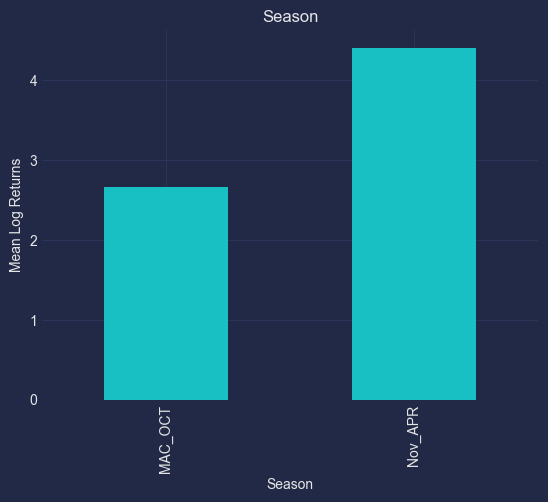

In [18]:
seas.plot (kind = 'bar', title = 'Season')
plt.xlabel ('Season')
plt.ylabel ('Mean Log Returns')
plt.show ()

In [19]:
btc_fil = btc_mes.copy ()

btc_fil = btc_fil.drop(columns=['DSR', 'log_returns', 'seasonality' ])
#btc_fil  = btc_fil[~btc_fil['num_mes'].isin([4, 10])]


btc_fil ['DSR'] = btc_fil ['Price'].pct_change (1)
btc_fil ['log_returns'] = np.log (1 + btc_fil ['DSR'])

# Reemplazar los valores en columna1 y columna2 donde num_mes es igual a 4 o 10
btc_fil.loc[btc_fil['num_mes'].isin([4, 10]), ['DSR', 'log_returns']] = 0


btc_fil ['ganancias'] = (1 + btc_fil['DSR']).cumprod()


#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

btc_fil.info ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2014-01-31 to 2024-03-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        123 non-null    float64
 1   nombre_mes   123 non-null    object 
 2   num_mes      123 non-null    int64  
 3   DSR          122 non-null    float64
 4   log_returns  122 non-null    float64
 5   ganancias    122 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.7+ KB


In [20]:

btc_mes ['ganancias'] = (1 + btc_mes['DSR']).cumprod()

btc_mes.tail (4)

,Price,DSR,log_returns,nombre_mes,num_mes,seasonality,ganancias
Date,,,,,,,
2023-12-31,38688.0,0.092172,0.088168,December,12,Nov_APR,47.469939
2024-01-31,44183.0,0.142034,0.132811,January,1,Nov_APR,54.212270
2024-02-29,43081.0,-0.024942,-0.025258,February,2,Nov_APR,52.860123
2024-03-31,62397.0,0.448365,0.370435,March,3,Nov_APR,76.560736


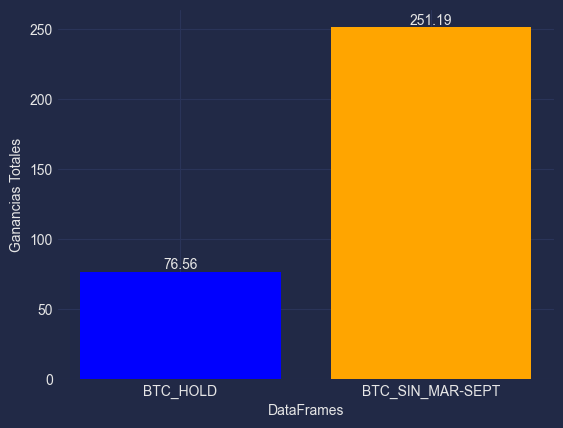

In [21]:
import matplotlib.pyplot as plt

# Calcular las ganancias totales de cada DataFrame
ganancias_totales_mes = btc_mes.iloc[-1]['ganancias']
ganancias_totales_fil = btc_fil.iloc[-1]['ganancias']

# Crear una lista con las ganancias totales
ganancias_totales = [ganancias_totales_mes, ganancias_totales_fil]

# Crear una lista con los nombres de los DataFrames
nombres_df = ['BTC_HOLD', 'BTC_SIN_MAR-SEPT']

# Configurar el gráfico de barras
plt.bar(nombres_df, ganancias_totales, color=['blue', 'orange'])

# Configurar etiquetas y título
plt.xlabel('DataFrames')
plt.ylabel('Ganancias Totales')


# Agregar números encima de cada columna
for i in range(len(nombres_df)):
    plt.text(nombres_df[i], ganancias_totales[i], str(round(ganancias_totales[i], 2)),
             ha='center', va='bottom')

# Mostrar el gráfico de barras
plt.show()
